In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from src.dynamic_pricing_data_loader import cargar_y_preparar_datos

In [2]:
def Get_Data():
    # Obtener el directorio de trabajo actual (ruta principal del proyecto).
    ruta_principal = os.getcwd()

    # Construir la ruta al archivo de configuración "config/config.json".
    config_path = os.path.join(ruta_principal, "config", "config.json")

    # Llamar a la función externa que carga y realiza preprocesamiento inicial.
    Frame = cargar_y_preparar_datos(config_path, ruta_principal)

    # Seleccionar solo las columnas relevantes para el análisis.
    Frame = Frame[["FECHA_CORRIDA", "HORA_SALIDA_CORRIDA", "CLASE_SERVICIO", "TIPO_BUS",
    "PAX_SUBEN", "TARIFA_BASE_TRAMO",'FECHA_OPERACION', 'HORA_OPERACION','VENTA','DISPONIBILIDAD_TRAMO']].copy()

    return Frame

In [3]:
df=Get_Data()

Memoria usada antes: 621.05 MB
Memoria usada después: 120.74 MB
Reducción: 80.6%


In [4]:
df['HORA_OPERACION'] = pd.to_datetime(
    df['HORA_OPERACION']
).dt.time

# 1. Combinar fecha y hora en una sola columna datetime
df['FECHA_HORA_OPERACION'] = pd.to_datetime(
    df['FECHA_OPERACION'].astype(str) + ' ' + df['HORA_OPERACION'].astype(str),
    errors='coerce'
)

In [5]:
df.head()

,FECHA_CORRIDA,HORA_SALIDA_CORRIDA,CLASE_SERVICIO,TIPO_BUS,PAX_SUBEN,TARIFA_BASE_TRAMO,FECHA_OPERACION,HORA_OPERACION,VENTA,DISPONIBILIDAD_TRAMO,FECHA_HORA_OPERACION
0,2023-01-01,1900-01-01 08:20:00,DOS PISOS ETN,MAN AYATS 2019,35,978.450012,2023-01-01,00:17:12,888.359985,0,2023-01-01 00:17:12
1,2023-01-03,1900-01-01 11:00:00,DOS PISOS ETN,MAN AYATS 2019,23,978.450012,2023-01-01,00:55:33,880.599976,12,2023-01-01 00:55:33
2,2023-01-03,1900-01-01 11:00:00,DOS PISOS ETN,MAN AYATS 2019,23,978.450012,2023-01-01,00:55:33,880.599976,12,2023-01-01 00:55:33
3,2023-01-03,1900-01-01 11:00:00,DOS PISOS ETN,MAN AYATS 2019,23,978.450012,2023-01-01,00:55:33,880.599976,12,2023-01-01 00:55:33
4,2023-01-03,1900-01-01 11:00:00,DOS PISOS ETN,MAN AYATS 2019,23,978.450012,2023-01-01,00:55:33,880.599976,12,2023-01-01 00:55:33


# Preparacion data para XGBOOST

In [6]:
df_estudio_1=df[["FECHA_CORRIDA", "HORA_SALIDA_CORRIDA", "CLASE_SERVICIO", "TIPO_BUS",
    "PAX_SUBEN", "TARIFA_BASE_TRAMO"]].copy()

In [7]:
""" 'OPERACION', 'TRANSACCION', 'FECHA_OPERACION', 'HORA_OPERACION',
       'NOMBRE_DIA_OPERACION', 'AREA_VENTA', 'CLASE_SERVICIO', 'ORIGEN',
       'DESTINO', 'CV_CORRIDA', 'FECHA_CORRIDA', 'HORA_SALIDA_CORRIDA',
       'TIPO_PASAJERO', 'TIPO_CLIENTE', 'TIPO_OPERACION', 'VENTA_ANTICIPADA',
       'NOMBRE_PASAJERO', 'NUM_ASIENTO', 'PORCENT_PROMO', 'DESC_DESCUENTO',
       'BOLETOS_CANCEL', 'BOLETOS_TOTALES', 'BOLETOS_VEND', 'VENTA_CANCEL',
       'IVA_CANCEL', 'IVA_VENDIDO', 'VENTA_TOTAL', 'VENTA', 'CV_ASIGN',
       'ORIGEN_CORRIDA', 'DESTINO_CORRIDA', 'CAPACIDAD_ASIENTOS_TRAMO',
       'KMS_TRAMO', 'EMPRESA', 'TIPO_CORRIDA', 'TIPO_BUS',
       'HORA_SALIDA_ORIGEN_CORRIDA', 'KMS_ACUM_CORRIDA', 'NOMBRE_DIA_CORRIDA',
       'TARIFA_BASE_TRAMO', 'IVA_TARIFA_BASE_TRAMO', 'INGRESO_TRANSP',
       'IVA_TRANSP', 'DISPONIBILIDAD_TRAMO', 'OCUPACION_TRAMO', 'PAX_BAJAN',
       'PAX_SUBEN', 'TARJETA', 'EFECTIVO', 'EMAIL', 'PAGO_METODO',
       'TOTAL_BOLETOS', 'TOTAL_VENTA', 'DIF_TARIF', 'HORA_DECIMAL', 'AÑO',
       'MES', 'DIAS_ANTICIPACION', 'HORAS_ANTICIPACION',
       'TIEMPO_ANTICIPACION'
"""

" 'OPERACION', 'TRANSACCION', 'FECHA_OPERACION', 'HORA_OPERACION',\n       'NOMBRE_DIA_OPERACION', 'AREA_VENTA', 'CLASE_SERVICIO', 'ORIGEN',\n       'DESTINO', 'CV_CORRIDA', 'FECHA_CORRIDA', 'HORA_SALIDA_CORRIDA',\n       'TIPO_PASAJERO', 'TIPO_CLIENTE', 'TIPO_OPERACION', 'VENTA_ANTICIPADA',\n       'NOMBRE_PASAJERO', 'NUM_ASIENTO', 'PORCENT_PROMO', 'DESC_DESCUENTO',\n       'BOLETOS_CANCEL', 'BOLETOS_TOTALES', 'BOLETOS_VEND', 'VENTA_CANCEL',\n       'IVA_CANCEL', 'IVA_VENDIDO', 'VENTA_TOTAL', 'VENTA', 'CV_ASIGN',\n       'ORIGEN_CORRIDA', 'DESTINO_CORRIDA', 'CAPACIDAD_ASIENTOS_TRAMO',\n       'KMS_TRAMO', 'EMPRESA', 'TIPO_CORRIDA', 'TIPO_BUS',\n       'HORA_SALIDA_ORIGEN_CORRIDA', 'KMS_ACUM_CORRIDA', 'NOMBRE_DIA_CORRIDA',\n       'TARIFA_BASE_TRAMO', 'IVA_TARIFA_BASE_TRAMO', 'INGRESO_TRANSP',\n       'IVA_TRANSP', 'DISPONIBILIDAD_TRAMO', 'OCUPACION_TRAMO', 'PAX_BAJAN',\n       'PAX_SUBEN', 'TARJETA', 'EFECTIVO', 'EMAIL', 'PAGO_METODO',\n       'TOTAL_BOLETOS', 'TOTAL_VENTA', 'DIF_TARI

In [8]:
# Número de NaN por columna
nans_por_columna = df_estudio_1.isna().sum()

print(nans_por_columna)


FECHA_CORRIDA          0
HORA_SALIDA_CORRIDA    0
CLASE_SERVICIO         0
TIPO_BUS               0
PAX_SUBEN              0
TARIFA_BASE_TRAMO      0
dtype: int64


In [9]:
df_estudio_1['HORA_SALIDA_CORRIDA'] = pd.to_datetime(
    df_estudio_1['HORA_SALIDA_CORRIDA']
).dt.time

In [10]:
df_estudio_1.head()

,FECHA_CORRIDA,HORA_SALIDA_CORRIDA,CLASE_SERVICIO,TIPO_BUS,PAX_SUBEN,TARIFA_BASE_TRAMO
0,2023-01-01,08:20:00,DOS PISOS ETN,MAN AYATS 2019,35,978.450012
1,2023-01-03,11:00:00,DOS PISOS ETN,MAN AYATS 2019,23,978.450012
2,2023-01-03,11:00:00,DOS PISOS ETN,MAN AYATS 2019,23,978.450012
3,2023-01-03,11:00:00,DOS PISOS ETN,MAN AYATS 2019,23,978.450012
4,2023-01-03,11:00:00,DOS PISOS ETN,MAN AYATS 2019,23,978.450012


In [11]:
print("Iniciando la ingeniería de características...")

# 1. Combinar fecha y hora en una sola columna datetime
df_estudio_1['FECHA_HORA_SALIDA'] = pd.to_datetime(
    df_estudio_1['FECHA_CORRIDA'].astype(str) + ' ' + df_estudio_1['HORA_SALIDA_CORRIDA'].astype(str),
    errors='coerce'
)

# 2. Extraer características de tiempo
df_estudio_1['HORA'] = df_estudio_1['FECHA_HORA_SALIDA'].dt.hour
df_estudio_1['DIA_SEMANA'] = df_estudio_1['FECHA_HORA_SALIDA'].dt.dayofweek # Lunes=0, Domingo=6
df_estudio_1['MES'] = df_estudio_1['FECHA_HORA_SALIDA'].dt.month
df_estudio_1['ANIO'] = df_estudio_1['FECHA_HORA_SALIDA'].dt.year

# 3. Limpiar columnas originales y posibles errores de conversión
df_estudio_1.drop(columns=['FECHA_CORRIDA', 'HORA_SALIDA_CORRIDA'], inplace=True)
df_estudio_1.dropna(subset=['FECHA_HORA_SALIDA'], inplace=True) # Elimina filas si hubo errores al combinar fecha/hora

print("✅ Ingeniería de características completada.")
print("\nVista previa del DataFrame procesado:")

df_estudio_1.head()

Iniciando la ingeniería de características...
✅ Ingeniería de características completada.

Vista previa del DataFrame procesado:


,CLASE_SERVICIO,TIPO_BUS,PAX_SUBEN,TARIFA_BASE_TRAMO,FECHA_HORA_SALIDA,HORA,DIA_SEMANA,MES,ANIO
0,DOS PISOS ETN,MAN AYATS 2019,35,978.450012,2023-01-01 08:20:00,8,6,1,2023
1,DOS PISOS ETN,MAN AYATS 2019,23,978.450012,2023-01-03 11:00:00,11,1,1,2023
2,DOS PISOS ETN,MAN AYATS 2019,23,978.450012,2023-01-03 11:00:00,11,1,1,2023
3,DOS PISOS ETN,MAN AYATS 2019,23,978.450012,2023-01-03 11:00:00,11,1,1,2023
4,DOS PISOS ETN,MAN AYATS 2019,23,978.450012,2023-01-03 11:00:00,11,1,1,2023


In [12]:
# Las columnas que identifican una corrida única son tus variables predictoras
columnas_agrupacion = [
    'FECHA_HORA_SALIDA',
    'CLASE_SERVICIO',
    'TIPO_BUS',
    'TARIFA_BASE_TRAMO',
    'HORA',
    'DIA_SEMANA',
    'MES',
    'ANIO'
]

df_modelo_demanda = df_estudio_1.groupby(
    columnas_agrupacion,
    observed=True  # Esto evita crear el producto cartesiano de TODAS las combinaciones posibles.
).agg(
    PASAJEROS_TOTALES=('PAX_SUBEN', 'size')
).reset_index()

print("✅ Datos agregados y listos para el modelo.")
print(df_modelo_demanda.head())


✅ Datos agregados y listos para el modelo.
    FECHA_HORA_SALIDA CLASE_SERVICIO        TIPO_BUS  TARIFA_BASE_TRAMO  HORA  \
0 2023-01-01 07:00:00  DOS PISOS ETN  MAN AYATS 2019         978.450012     7   
1 2023-01-01 08:20:00  DOS PISOS ETN  MAN AYATS 2019         978.450012     8   
2 2023-01-01 09:50:00  DOS PISOS ETN  MAN AYATS 2019         978.450012     9   
3 2023-01-01 13:15:00        DE LUJO  MARCOPOLO 2019         978.450012    13   
4 2023-01-01 15:00:00  DOS PISOS ETN  MAN AYATS 2019         978.450012    15   

   DIA_SEMANA  MES  ANIO  PASAJEROS_TOTALES  
0           6    1  2023                  2  
1           6    1  2023                  5  
2           6    1  2023                  2  
3           6    1  2023                 30  
4           6    1  2023                  3  


In [13]:
print("--- Iniciando enriquecimiento con contexto de negocio (Versión Final) ---")

# --- PARTE 1: Bandera de Quincena (Conservada del código original) ---

print("Creando bandera de quincena...")
dias_quincena = [14, 15, 16, 30, 31, 1]
df_modelo_demanda['ES_QUINCENA'] = df_modelo_demanda['FECHA_HORA_SALIDA'].dt.day.isin(dias_quincena).astype(int)

# --- PARTE 2: Banderas del Calendario Escolar (El código mejorado) ---

print("Creando banderas de calendario escolar...")
# Periodos de VACACIONES
vacaciones_periodos = {
    'semana_santa_2023': pd.date_range(start='2023-04-03', end='2023-04-14'),
    'invierno_2023': pd.date_range(start='2023-12-18', end='2024-01-07'),
    'semana_santa_2024': pd.date_range(start='2024-03-25', end='2024-04-05'),
    'verano_2024': pd.date_range(start='2024-07-17', end='2024-08-25'),
    'invierno_2024': pd.date_range(start='2024-12-19', end='2025-01-05'),
    'semana_santa_2025': pd.date_range(start='2025-04-14', end='2025-04-25'),
    'verano_2025': pd.date_range(start='2025-07-17', end='2025-08-24'),
    'invierno_2025': pd.date_range(start='2025-12-18', end='2026-01-04')
}
# SUSPENSIÓN DE LABORES (Puentes Oficiales)
puentes_oficiales = [
    '2023-02-06', '2023-03-20', '2023-05-01', '2023-05-05', '2023-05-15', '2023-11-20',
    '2024-02-05', '2024-03-18', '2024-05-01', '2024-05-15', '2024-09-16', '2024-11-18',
    '2025-02-03', '2025-03-17', '2025-05-01', '2025-05-05', '2025-05-15', '2025-09-16', '2025-11-17',
    '2026-02-02', '2026-03-16', '2026-05-01', '2026-05-05', '2026-05-15'
]
# CONSEJO TÉCNICO ESCOLAR
consejos_tecnicos = [
    '2023-01-27', '2023-02-24', '2023-03-31', '2023-04-28', '2023-05-26', '2023-06-30',
    '2023-09-29', '2023-10-27', '2023-11-24', '2024-01-26', '2024-02-23', '2024-04-26',
    '2024-05-31', '2024-06-28', '2024-09-27', '2024-10-25', '2024-11-29', '2025-01-31',
    '2025-02-28', '2025-03-28', '2025-05-30', '2025-06-27', '2025-09-26', '2025-10-31',
    '2025-11-28', '2026-01-30', '2026-02-27', '2026-03-27', '2026-05-29', '2026-06-26'
]

# Procesar y aplicar las banderas del calendario
todas_las_vacaciones = np.concatenate(list(vacaciones_periodos.values()))
df_modelo_demanda['ES_VACACIONES'] = df_modelo_demanda['FECHA_HORA_SALIDA'].dt.date.isin(pd.to_datetime(todas_las_vacaciones).date).astype(int)
df_modelo_demanda['ES_PUENTE'] = df_modelo_demanda['FECHA_HORA_SALIDA'].dt.date.isin(pd.to_datetime(puentes_oficiales).date).astype(int)
df_modelo_demanda['ES_CONSEJO_TECNICO'] = df_modelo_demanda['FECHA_HORA_SALIDA'].dt.date.isin(pd.to_datetime(consejos_tecnicos).date).astype(int)

print("✅ Enriquecimiento final completado.")
print("\nConteo de registros marcados con las nuevas banderas:")
print(df_modelo_demanda[['ES_QUINCENA', 'ES_VACACIONES', 'ES_PUENTE', 'ES_CONSEJO_TECNICO']].sum())

--- Iniciando enriquecimiento con contexto de negocio (Versión Final) ---
Creando bandera de quincena...
Creando banderas de calendario escolar...
✅ Enriquecimiento final completado.

Conteo de registros marcados con las nuevas banderas:
ES_QUINCENA           2801
ES_VACACIONES         2784
ES_PUENTE              330
ES_CONSEJO_TECNICO     376
dtype: int64


In [14]:
print("\nEstadísticas generales de la demanda:")
print(df_modelo_demanda['PASAJEROS_TOTALES'].describe())


Estadísticas generales de la demanda:
count    15327.000000
mean        25.472630
std         16.675465
min          1.000000
25%         13.000000
50%         23.000000
75%         35.000000
max        181.000000
Name: PASAJEROS_TOTALES, dtype: float64


--- Visualizando el Impacto de las 4 Características de Contexto ---


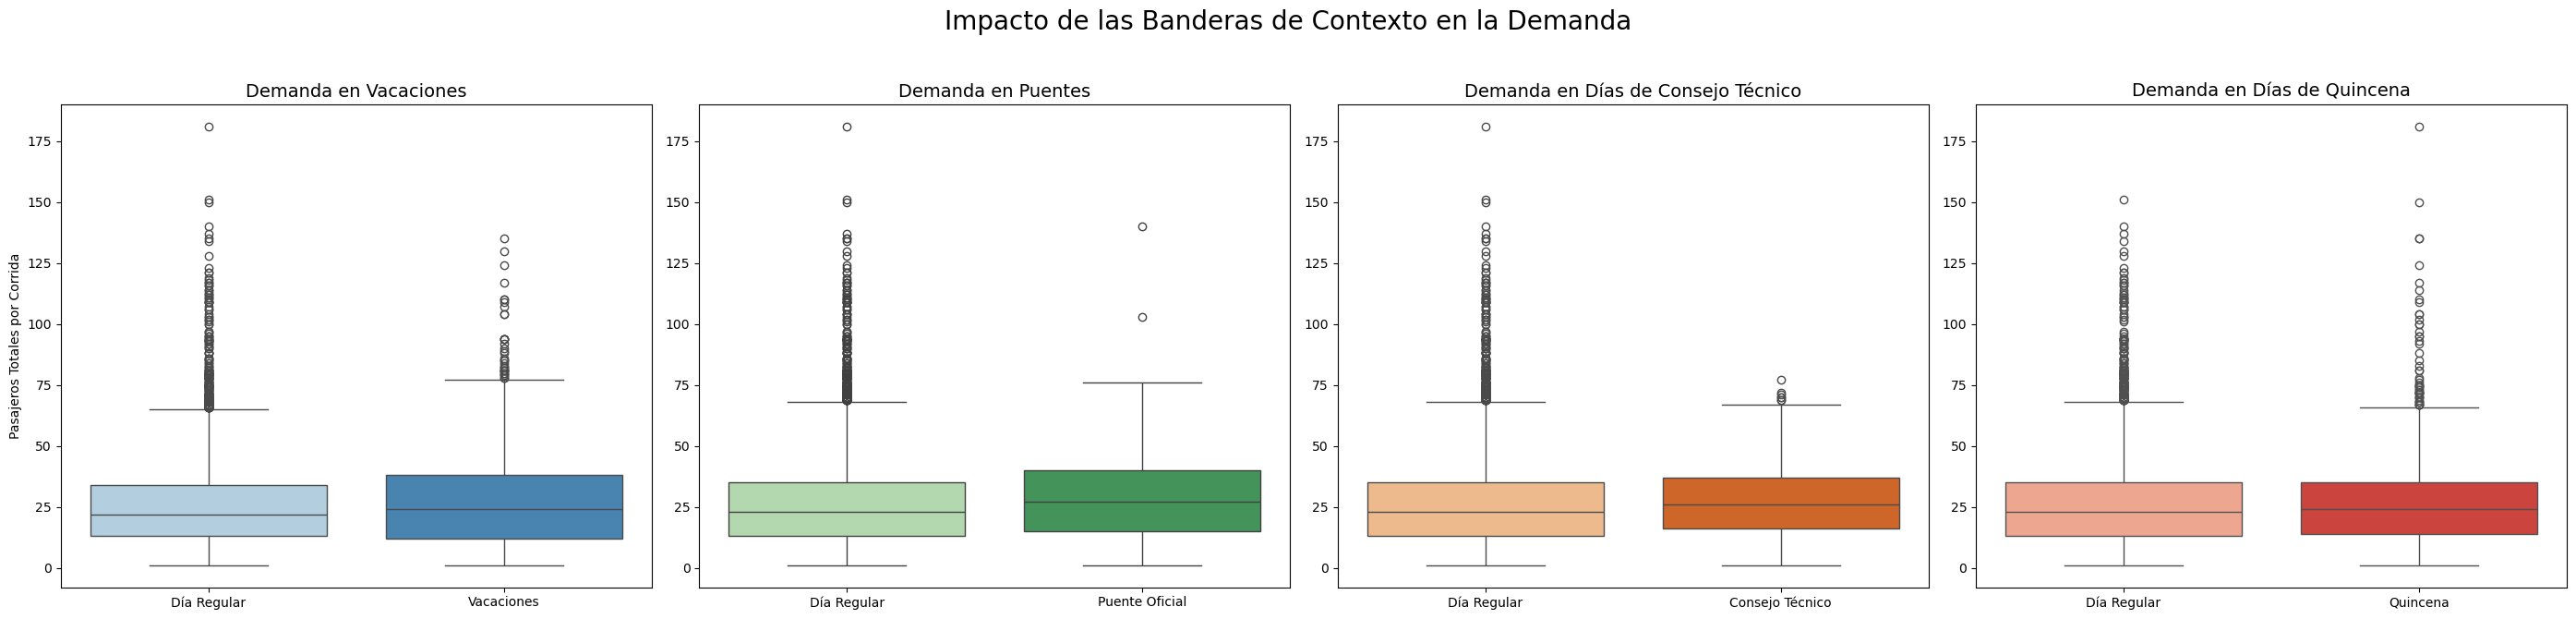

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Visualizando el Impacto de las 4 Características de Contexto ---")

# Creamos una figura con CUATRO subplots y la hacemos más ancha
# <-- CAMBIO: 1, 4 en subplots y un figsize más grande
fig, axes = plt.subplots(1, 4, figsize=(28, 7))
fig.suptitle('Impacto de las Banderas de Contexto en la Demanda', fontsize=20)

# Gráfico 1: Impacto de las Vacaciones
sns.boxplot(ax=axes[0], x='ES_VACACIONES', y='PASAJEROS_TOTALES', data=df_modelo_demanda, palette='Blues')
axes[0].set_title('Demanda en Vacaciones', fontsize=14)
axes[0].set_xticklabels(['Día Regular', 'Vacaciones'])
axes[0].set_xlabel('')
axes[0].set_ylabel('Pasajeros Totales por Corrida')

# Gráfico 2: Impacto de los Puentes
sns.boxplot(ax=axes[1], x='ES_PUENTE', y='PASAJEROS_TOTALES', data=df_modelo_demanda, palette='Greens')
axes[1].set_title('Demanda en Puentes', fontsize=14)
axes[1].set_xticklabels(['Día Regular', 'Puente Oficial'])
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Gráfico 3: Impacto del Consejo Técnico
sns.boxplot(ax=axes[2], x='ES_CONSEJO_TECNICO', y='PASAJEROS_TOTALES', data=df_modelo_demanda, palette='Oranges')
axes[2].set_title('Demanda en Días de Consejo Técnico', fontsize=14)
axes[2].set_xticklabels(['Día Regular', 'Consejo Técnico'])
axes[2].set_xlabel('')
axes[2].set_ylabel('')

# <-- NUEVO GRÁFICO AÑADIDO ---
# Gráfico 4: Impacto de la Quincena
sns.boxplot(ax=axes[3], x='ES_QUINCENA', y='PASAJEROS_TOTALES', data=df_modelo_demanda, palette='Reds')
axes[3].set_title('Demanda en Días de Quincena', fontsize=14)
axes[3].set_xticklabels(['Día Regular', 'Quincena'])
axes[3].set_xlabel('')
axes[3].set_ylabel('')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [16]:
df_modelo_demanda.head(10)

,FECHA_HORA_SALIDA,CLASE_SERVICIO,TIPO_BUS,TARIFA_BASE_TRAMO,HORA,DIA_SEMANA,MES,ANIO,PASAJEROS_TOTALES,ES_QUINCENA,ES_VACACIONES,ES_PUENTE,ES_CONSEJO_TECNICO
0,2023-01-01 07:00:00,DOS PISOS ETN,MAN AYATS 2019,978.450012,7,6,1,2023,2,1,0,0,0
1,2023-01-01 08:20:00,DOS PISOS ETN,MAN AYATS 2019,978.450012,8,6,1,2023,5,1,0,0,0
2,2023-01-01 09:50:00,DOS PISOS ETN,MAN AYATS 2019,978.450012,9,6,1,2023,2,1,0,0,0
3,2023-01-01 13:15:00,DE LUJO,MARCOPOLO 2019,978.450012,13,6,1,2023,30,1,0,0,0
4,2023-01-01 15:00:00,DOS PISOS ETN,MAN AYATS 2019,978.450012,15,6,1,2023,3,1,0,0,0
5,2023-01-01 15:50:00,DOS PISOS ETN,MAN AYATS 2019,978.450012,15,6,1,2023,4,1,0,0,0
6,2023-01-01 17:00:00,DOS PISOS ETN,MAN AYATS 2019,978.450012,17,6,1,2023,7,1,0,0,0
7,2023-01-01 18:00:00,TURISTAR LUJO,VOLVO LUXURY,978.450012,18,6,1,2023,22,1,0,0,0
8,2023-01-01 19:30:00,DOS PISOS ETN,MAN AYATS 2019,978.450012,19,6,1,2023,3,1,0,0,0
9,2023-01-01 21:10:00,DE LUJO,MAN AYATS 2015,978.450012,21,6,1,2023,27,1,0,0,0


--- Generando Gráfico de Tendencia General (Corregido) ---


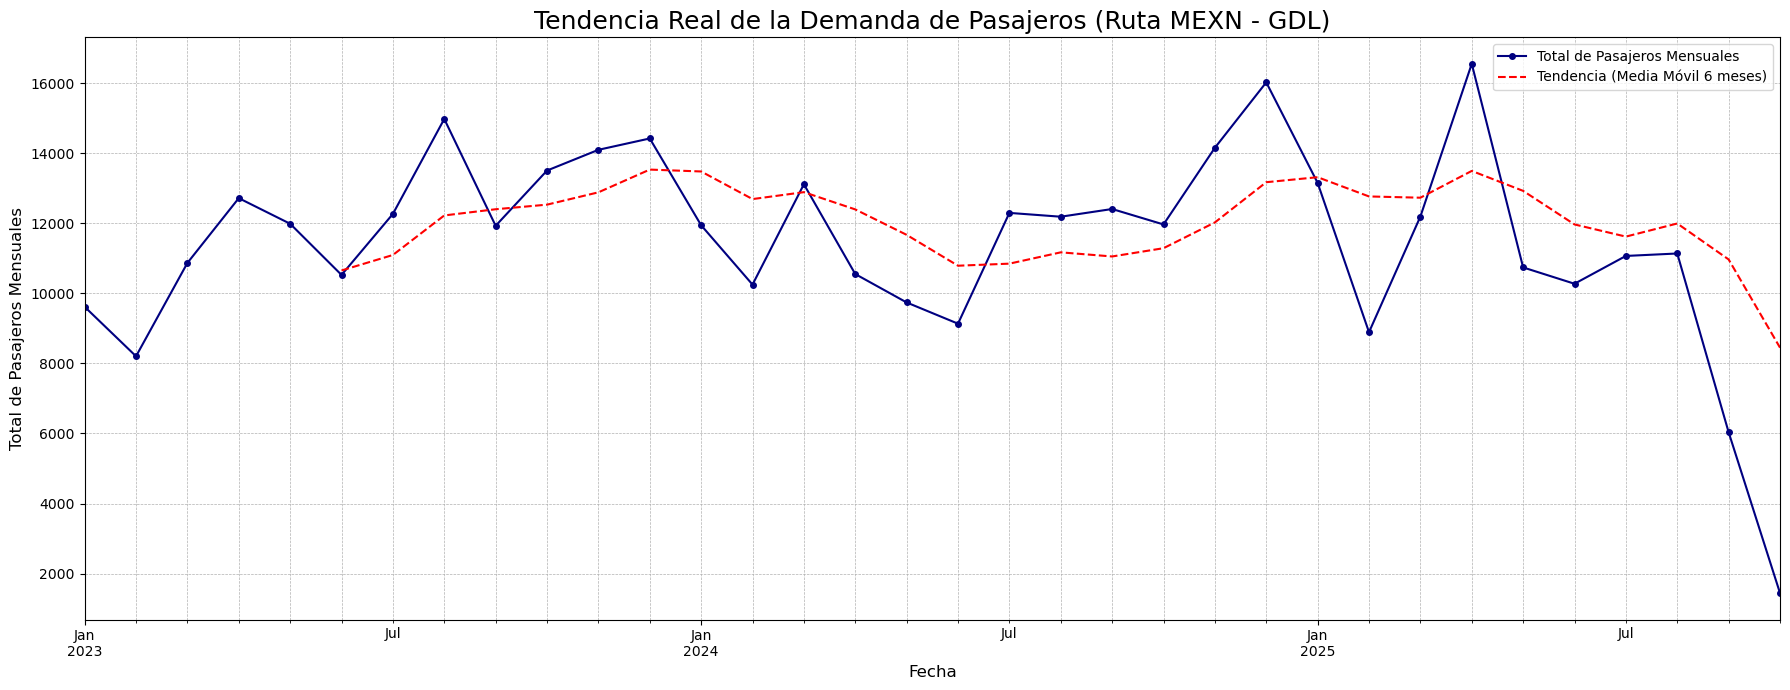

In [17]:
import matplotlib.pyplot as plt

print("--- Generando Gráfico de Tendencia General (Corregido) ---")

# 1. Preparar los datos: USAMOS EL DATAFRAME AGREGADO
df_temporal = df_modelo_demanda.copy().set_index('FECHA_HORA_SALIDA') # <-- CAMBIO 1

# 2. Agrupar los pasajeros por mes
#    USAMOS LA COLUMNA OBJETIVO CORRECTA
demanda_mensual = df_temporal['PASAJEROS_TOTALES'].resample('M').sum() # <-- CAMBIO 2

# 3. Crear el gráfico
plt.figure(figsize=(18, 7))

# Graficar los datos mensuales reales
demanda_mensual.plot(label='Total de Pasajeros Mensuales', color='navy', marker='o', markersize=4)

# Graficar la tendencia con una media móvil de 6 meses para suavizar la línea
demanda_mensual.rolling(window=6).mean().plot(label='Tendencia (Media Móvil 6 meses)', color='red', linestyle='--')

# 4. Mejorar la presentación del gráfico
plt.title('Tendencia Real de la Demanda de Pasajeros (Ruta MEXN - GDL)', fontsize=18)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Total de Pasajeros Mensuales', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# --- Importación de Librerías Fundamentales ---
import pandas as pd               # Para la manipulación de datos.
import numpy as np                # Para operaciones numéricas y manejo de arrays.
import matplotlib.pyplot as plt   # Para crear gráficos y visualizaciones.
import seaborn as sns             # Para gráficos estadísticos más atractivos.
import time                       # Para medir el tiempo de ejecución de los modelos.

# --- Importación de Herramientas de Scikit-learn ---
from sklearn.model_selection import train_test_split  # Para dividir los datos.
from sklearn.metrics import mean_absolute_error, r2_score # Para evaluar el rendimiento.

# --- Importación de los Modelos de Machine Learning ---
# Importamos modelos de ensamble.
from xgboost import XGBRegressor

# --- Configuración de Visualización ---
# Para que los gráficos aparezcan directamente en el notebook.
%matplotlib inline

print("Librerías para el modelado avanzado cargadas exitosamente.")

# 1. Definir las características (X) y el objetivo (y) USANDO EL DATAFRAME AGREGADO
# Dejamos fuera la fecha completa, ya que extrajimos toda su información.
X = df_modelo_demanda.drop(columns=['PASAJEROS_TOTALES', 'FECHA_HORA_SALIDA'])
y = df_modelo_demanda['PASAJEROS_TOTALES']

# 2. Convertir variables categóricas a numéricas (One-Hot Encoding)
# Ajustamos las columnas, ya que ORIGEN y DESTINO no están en este DataFrame.
X_encoded = pd.get_dummies(X, columns=['CLASE_SERVICIO', 'TIPO_BUS'], drop_first=True)

# 3. Dividir los datos en entrenamiento y prueba
# Usamos las nuevas variables X_encoded y y
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 4. Verificación final de las dimensiones
print("¡División completada correctamente!")
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_test: {y_test.shape}")

# Muestra las primeras filas de tus datos listos para el modelo
print("\nColumnas del set de entrenamiento:")
print(X_train.columns)

Librerías para el modelado avanzado cargadas exitosamente.
¡División completada correctamente!
Forma de X_train: (12261, 39)
Forma de y_train: (12261,)
Forma de X_test: (3066, 39)
Forma de y_test: (3066,)

Columnas del set de entrenamiento:
Index(['TARIFA_BASE_TRAMO', 'HORA', 'DIA_SEMANA', 'MES', 'ANIO', 'ES_QUINCENA',
       'ES_VACACIONES', 'ES_PUENTE', 'ES_CONSEJO_TECNICO',
       'CLASE_SERVICIO_DOS PISOS ETN', 'CLASE_SERVICIO_DOS PISOS TURISTAR',
       'CLASE_SERVICIO_DTM DOS PISOS', 'CLASE_SERVICIO_TURISTAR LUJO',
       'CLASE_SERVICIO_UN PISO DE LUJO',
       'CLASE_SERVICIO_UN PISO TURISTAR LUJO', 'TIPO_BUS_MAN AYATS 2012',
       'TIPO_BUS_MAN AYATS 2013', 'TIPO_BUS_MAN AYATS 2015',
       'TIPO_BUS_MAN AYATS 2016', 'TIPO_BUS_MAN AYATS 2017',
       'TIPO_BUS_MAN AYATS 2019', 'TIPO_BUS_MAN AYATS 21',
       'TIPO_BUS_MAN AYATS 23', 'TIPO_BUS_MAN AYATS-2013',
       'TIPO_BUS_MAN AYATS-2014', 'TIPO_BUS_MARCOPOLO 2016',
       'TIPO_BUS_MARCOPOLO 2017', 'TIPO_BUS_MARCOPOLO 201

# **Inicializar modelos**

In [19]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

print("--- Iniciando Optimización de Hiperparámetros ---")

# 1. Definir el espacio de parámetros que queremos probar
# Estas son algunas de las configuraciones más comunes para XGBoost
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# 2. Crear una instancia del modelo base
xgb_base = XGBRegressor(random_state=42)

# 3. Configurar la búsqueda aleatoria
# n_iter=50 significa que probará 50 combinaciones al azar
# cv=5 es la validación cruzada para asegurar que los resultados son estables
# n_jobs=-1 usa todos los procesadores de tu máquina para ir más rápido
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='r2' # La métrica que queremos maximizar
)

# 4. Ejecutar la búsqueda (esto puede tardar varios minutos)
print("Buscando la mejor combinación de hiperparámetros...")
random_search.fit(X_train, y_train)

# 5. Mostrar los mejores parámetros encontrados
print("\n✅ Búsqueda completada.")
print("Los mejores hiperparámetros encontrados son:")
print(random_search.best_params_)

# Ahora, el 'random_search.best_estimator_' es tu nuevo modelo optimizado
print("\nAhora puedes usar 'random_search.best_estimator_' para evaluar de nuevo.")

--- Iniciando Optimización de Hiperparámetros ---
Buscando la mejor combinación de hiperparámetros...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

✅ Búsqueda completada.
Los mejores hiperparámetros encontrados son:
{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}

Ahora puedes usar 'random_search.best_estimator_' para evaluar de nuevo.


In [20]:
# --- Asunción: El 'random_search.fit()' del paso anterior ya terminó ---

print("\n--- Evaluando el Modelo FINAL OPTIMIZADO ---")

# 1. Obtenemos el mejor modelo que encontró la búsqueda
xgb_optimizado = random_search.best_estimator_

# 2. Hacemos predicciones y evaluamos como antes
y_pred_optimizado = xgb_optimizado.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred_optimizado)
test_r2 = r2_score(y_test, y_pred_optimizado)

y_train_pred_optimizado = xgb_optimizado.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred_optimizado)

# --- 3. Mostramos la tabla de diagnóstico final ---
print("\n--- TABLA DE DIAGNÓSTICO (MODELO OPTIMIZADO) ---")
diagnostico_df_optimizado = pd.DataFrame({
    'Métrica': ['MAE en Prueba', 'MAE en Entrenamiento', 'R² en Prueba'],
    'Valor': [test_mae, train_mae, test_r2]
})
print(diagnostico_df_optimizado.round(4))

gap_sobreajuste = test_mae - train_mae
print(f"\nGap (Sobreajuste): {gap_sobreajuste:.4f}")

print("\n--- CONCLUSIÓN FINAL---")
print(f"🏆 El modelo OPTIMIZADO tiene un error promedio de {test_mae:.2f} pasajeros y explica el {test_r2 * 100:.1f}% de la demanda.")


--- Evaluando el Modelo FINAL OPTIMIZADO ---

--- TABLA DE DIAGNÓSTICO (MODELO OPTIMIZADO) ---
                Métrica   Valor
0         MAE en Prueba  9.2998
1  MAE en Entrenamiento  8.0442
2          R² en Prueba  0.3701

Gap (Sobreajuste): 1.2556

--- CONCLUSIÓN FINAL---
🏆 El modelo OPTIMIZADO tiene un error promedio de 9.30 pasajeros y explica el 37.0% de la demanda.


# Preparacion data para Red Neuronal

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error

In [22]:
print("\nPaso 1: Generando predicciones de demanda total...")
X_demanda_full = df_modelo_demanda.drop(columns=['PASAJEROS_TOTALES', 'FECHA_HORA_SALIDA'])
X_demanda_full_encoded = pd.get_dummies(X_demanda_full, columns=['CLASE_SERVICIO', 'TIPO_BUS'], drop_first=True)


Paso 1: Generando predicciones de demanda total...


In [23]:
X_demanda_full_encoded.shape

(15327, 39)

In [24]:
df_modelo_demanda['DEMANDA_PREDICHA'] = np.round(xgb_optimizado.predict(X_demanda_full_encoded)).astype(int)

In [25]:
df_modelo_demanda.isna().sum()

FECHA_HORA_SALIDA     0
CLASE_SERVICIO        0
TIPO_BUS              0
TARIFA_BASE_TRAMO     0
HORA                  0
DIA_SEMANA            0
MES                   0
ANIO                  0
PASAJEROS_TOTALES     0
ES_QUINCENA           0
ES_VACACIONES         0
ES_PUENTE             0
ES_CONSEJO_TECNICO    0
DEMANDA_PREDICHA      0
dtype: int64

In [26]:
df_modelo_demanda.shape

(15327, 14)

In [31]:
cols_union = [ 'CLASE_SERVICIO', 'TIPO_BUS', 'TARIFA_BASE_TRAMO', 'HORA', 'DIA_SEMANA', 'MES', 'ANIO']
df1=df_estudio_1[cols_union].copy()
#df1 = pd.merge(df1, df_modelo_demanda[cols_union + ['DEMANDA_PREDICHA']], on=cols_union, how='left')
df1[['VENTA', 'DISPONIBILIDAD_TRAMO']]=df[[ 'VENTA', 'DISPONIBILIDAD_TRAMO']].copy()
df1['DIAS_DE_ANTICIPACION'] = (df_estudio_1['FECHA_HORA_SALIDA'] - df['FECHA_HORA_OPERACION']).dt.total_seconds() / (24 * 60 * 60)
df1['DEMANDA_PREDICHA']= df_modelo_demanda['DEMANDA_PREDICHA'].copy()

Aquí la cagó porque la demanda predicha está calculada basandote en la agrupacion que se hizo anteriormente, mientrasque df sigue teniendo el tamaño original, es decir, el que habia antes de la agrupacion, el detalle se aprecia la siguiente sección de codigo:

Las columnas que identifican una corrida única son tus variables predictoras

columnas_agrupacion = [
    'FECHA_HORA_SALIDA',
    'CLASE_SERVICIO',
    'TIPO_BUS',
    'TARIFA_BASE_TRAMO',
    'HORA',
    'DIA_SEMANA',
    'MES',
    'ANIO'
]

df_modelo_demanda = df_estudio_1.groupby(
    columnas_agrupacion,
    observed=True  # Esto evita crear el producto cartesiano de TODAS las combinaciones posibles.
).agg(
    PASAJEROS_TOTALES=('PAX_SUBEN', 'size')
).reset_index()


In [32]:
df1.head()

,CLASE_SERVICIO,TIPO_BUS,TARIFA_BASE_TRAMO,HORA,DIA_SEMANA,MES,ANIO,VENTA,DISPONIBILIDAD_TRAMO,DIAS_DE_ANTICIPACION,DEMANDA_PREDICHA
0,DOS PISOS ETN,MAN AYATS 2019,978.450012,8,6,1,2023,888.359985,0,0.335278,12.0
1,DOS PISOS ETN,MAN AYATS 2019,978.450012,11,1,1,2023,880.599976,12,2.419757,16.0
2,DOS PISOS ETN,MAN AYATS 2019,978.450012,11,1,1,2023,880.599976,12,2.419757,15.0
3,DOS PISOS ETN,MAN AYATS 2019,978.450012,11,1,1,2023,880.599976,12,2.419757,25.0
4,DOS PISOS ETN,MAN AYATS 2019,978.450012,11,1,1,2023,880.599976,12,2.419757,16.0


In [33]:
df1.shape

(390419, 11)

In [34]:
nans_por_columna = df1.isna().sum()

print(nans_por_columna)

CLASE_SERVICIO               0
TIPO_BUS                     0
TARIFA_BASE_TRAMO            0
HORA                         0
DIA_SEMANA                   0
MES                          0
ANIO                         0
VENTA                        0
DISPONIBILIDAD_TRAMO         0
DIAS_DE_ANTICIPACION         0
DEMANDA_PREDICHA        375092
dtype: int64


In [ ]:
# ==============================================================================
# Separar y Preparar los Datos para la Red Neuronal (Sin cambios en la lógica)
# ==============================================================================
print("\nPaso 4: Preparando los datos para el modelo de precios...")
y_precio = df1['VENTA']
X_precio = df1.drop(columns=['VENTA'])
X_precio_encoded = pd.get_dummies(X_precio, columns=['CLASE_SERVICIO', 'TIPO_BUS'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_precio_encoded, y_precio, test_size=0.2, random_state=42)

columnas_numericas = X_precio.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[columnas_numericas] = scaler.fit_transform(X_train[columnas_numericas])
X_test_scaled[columnas_numericas] = scaler.transform(X_test[columnas_numericas])
print("✅ Datos preparados, codificados, divididos y escalados.")

In [ ]:
X_train_scaled.head()

In [ ]:
# ==============================================================================
# Construir, Entrenar y Evaluar la Red Neuronal (Sin cambios en la lógica)
# ==============================================================================
print("\n--- Iniciando la construcción y entrenamiento del Modelo de Red Neuronal ---")
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    validation_split=0.2,
    verbose=1
)
print("--- Entrenamiento Finalizado ---")

predicciones_nn = model.predict(X_test_scaled)
mae_nn = mean_absolute_error(y_test, predicciones_nn)

print(f"\n\n--- RESULTADO FINAL DE LA ETAPA 2 ---")
print(f"Error Absoluto Medio (MAE) en el conjunto de prueba: ${mae_nn:.2f}")
print(f"-> Interpretación: En promedio, nuestro modelo de precios se equivoca por ±${mae_nn:.2f}.")

In [ ]:
predicciones_nn

In [ ]:
predicciones_nn.shape,X_train_scaled.shape, X_test_scaled.shape

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# --- Asunciones ---
# model: Tu red neuronal entrenada
# scaler: El escalador ajustado
# X_precio_train: El DataFrame de entrenamiento original (antes del escalado)
# X_train_scaled: El DataFrame de entrenamiento ya escalado (lo usaremos como plantilla de columnas)

def encontrar_precio_optimo(caracteristicas_viaje, rango_precios, modelo, escalador, columnas_plantilla, columnas_numericas_originales):
    """
    Simula diferentes precios para un viaje y encuentra el que maximiza el ingreso.
    """
    ingresos_esperados = {}

    for precio in rango_precios:
        # 1. Crear un DataFrame para este escenario de precio
        datos_simulados = pd.DataFrame([caracteristicas_viaje])

        # 2. Aplicar One-Hot Encoding
        datos_simulados_encoded = pd.get_dummies(datos_simulados)

        # 3. Alinear columnas con la plantilla de entrenamiento
        #    Esto asegura que tengamos exactamente las mismas columnas.
        datos_simulados_alineados = datos_simulados_encoded.reindex(columns=columnas_plantilla.columns, fill_value=0)

        # 4. Escalar solo las columnas numéricas
        datos_simulados_escalados = datos_simulados_alineados.copy()
        datos_simulados_escalados[columnas_numericas_originales] = escalador.transform(datos_simulados_alineados[columnas_numericas_originales])

        # 5. Predecir la demanda para este precio
        # Usamos el objetivo original 'PAX_SUBEN' que aprendió el modelo de demanda
        demanda_predicha = modelo.predict(datos_simulados_escalados, verbose=0)[0][0]

        # 6. Calcular el ingreso esperado
        ingreso = precio * demanda_predicha
        ingresos_esperados[precio] = ingreso

    # 7. Encontrar el precio que maximizó el ingreso
    precio_optimo = max(ingresos_esperados, key=ingresos_esperados.get)
    max_ingreso = ingresos_esperados[precio_optimo]

    return precio_optimo, max_ingreso, ingresos_esperados


# --- EJEMPLO DE CÓMO USAR LA FUNCIÓN CORREGIDA ---

# 1. Define el viaje futuro (sin la tarifa)
viaje_ejemplo = {
    'ORIGEN': 'MEXN',
    'DESTINO': 'GDL',
    'CLASE_SERVICIO': 'DOS PISOS ETN',
    'TIPO_BUS': 'MAN AYATS 2019',
    'HORA': 22,
    'DIA_SEMANA': 4, # Viernes
    'MES': 12,
    'ANIO': 2025,
    'Prediccion_PAX_SUBEN': 35,
    'DISPONIBILIDAD_TRAMO': 10,
    'DIAS_DE_ANTICIPACION': 3
}

# 2. Define el rango de precios a probar
precios_a_probar = range(800, 1501, 10)

# 3. Llama a la función
#    Necesitamos pasarle las columnas numéricas originales que usamos para ajustar el scaler
columnas_numericas_originales = X_precio.select_dtypes(include=np.number).columns

precio_final, ingreso_max, simulacion = encontrar_precio_optimo(
    viaje_ejemplo,
    precios_a_probar,
    model,      # Tu modelo de Red Neuronal entrenado para predecir demanda en base a precio
    scaler,     # Tu scaler ya ajustado
    X_train, # Usamos el X_train antes de escalar como plantilla
    columnas_numericas_originales
)

print(f"\n--- RESULTADO DE LA OPTIMIZACIÓN ---")
print(f"Para el viaje especificado, el precio dinámico que maximiza los ingresos es: ${precio_final}")
print(f"Con este precio, el ingreso esperado es de: ${ingreso_max:,.2f}")


In [ ]:
# Graficar la curva de ingresos
plt.figure(figsize=(10, 6))
plt.plot(list(simulacion.keys()), list(simulacion.values()))
plt.title('Curva de Ingreso Esperado vs. Precio')
plt.xlabel('Precio Ofrecido ($)')
plt.ylabel('Ingreso Total Esperado ($)')
plt.grid(True)
plt.show()